# Data Cleaning 

In [2]:
import pandas as pd
df = pd.read_csv('data-pozo/kc_house_data.csv')

In [3]:
#drop rows with null values
df.dropna(subset = ['heat_source', 'sewer_system'], inplace = True)

In [4]:
#change date to datetime and split out sale year and month
df['date'] = pd.to_datetime(df['date'])
df['sale_month'] = df['date'].dt.month.astype(int)
df['sale_year'] = df['date'].dt.year.astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  object        
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [6]:
df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

In [7]:
#drop rows containing addresses not in King County
        
zip_list = [98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zip_list = list(map(lambda x: str(x), zip_list))

df['in_target_area'] = df['address'].apply(lambda x: any(zip_code in x for zip_code in zip_list))
df = df.drop(df[df['in_target_area'] == False].index)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sale_month,sale_year,in_target_area
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,5,2022,True
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,12,2021,True
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,9,2021,True
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,12,2021,True
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,8,2021,True


In [9]:
# Breakout city and zipcode from the address column

def residential_check(value):
    if len(value.split(',')) == 4:
        return True
    if len(value.split(',')) != 4:
        return False

df['residential'] = df['address'].apply(lambda x: residential_check(x))    
df = df.drop(df[df['residential'] == False].index)
df[['House_Num', 'City', 'State_ZIP', 'Country']] = df['address'].str.split(',', expand=True)    
df[['Empty', 'State', 'ZIP']] = df['State_ZIP'].str.split(' ', expand=True) 
df.drop(columns = ['Empty', 'in_target_area', 'residential'], inplace = True)
df["City"] = df["City"].apply(lambda x: x.strip())
df["ZIP"] = df["ZIP"].apply(lambda x: x.strip())
df["House_Num"] = df["House_Num"].apply(lambda x: x.strip())

In [10]:
# Drop all duplicated housing IDs and addresses. Drop homes missing bed/bath data
df['id'].duplicated().value_counts()
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)


df['address'].duplicated().value_counts() 
df.sort_values(by = ['date'], ascending = False, inplace = True)
df.drop_duplicates(subset = ['address'], keep = 'first', inplace = True)

df = df[(df['bedrooms'] != 0) & (df['bathrooms'] != 0)]

df.reset_index(drop = True, inplace = True)

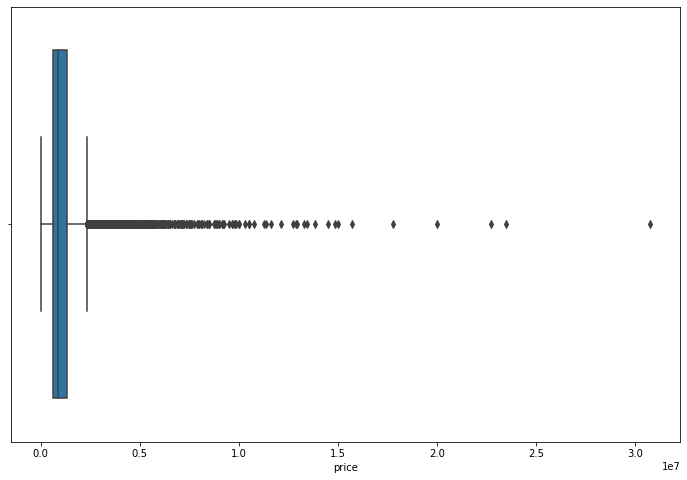

In [11]:
#Visualize price to find outliers 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x = df['price'])
plt.show()



# Pre-Split Data Transformation

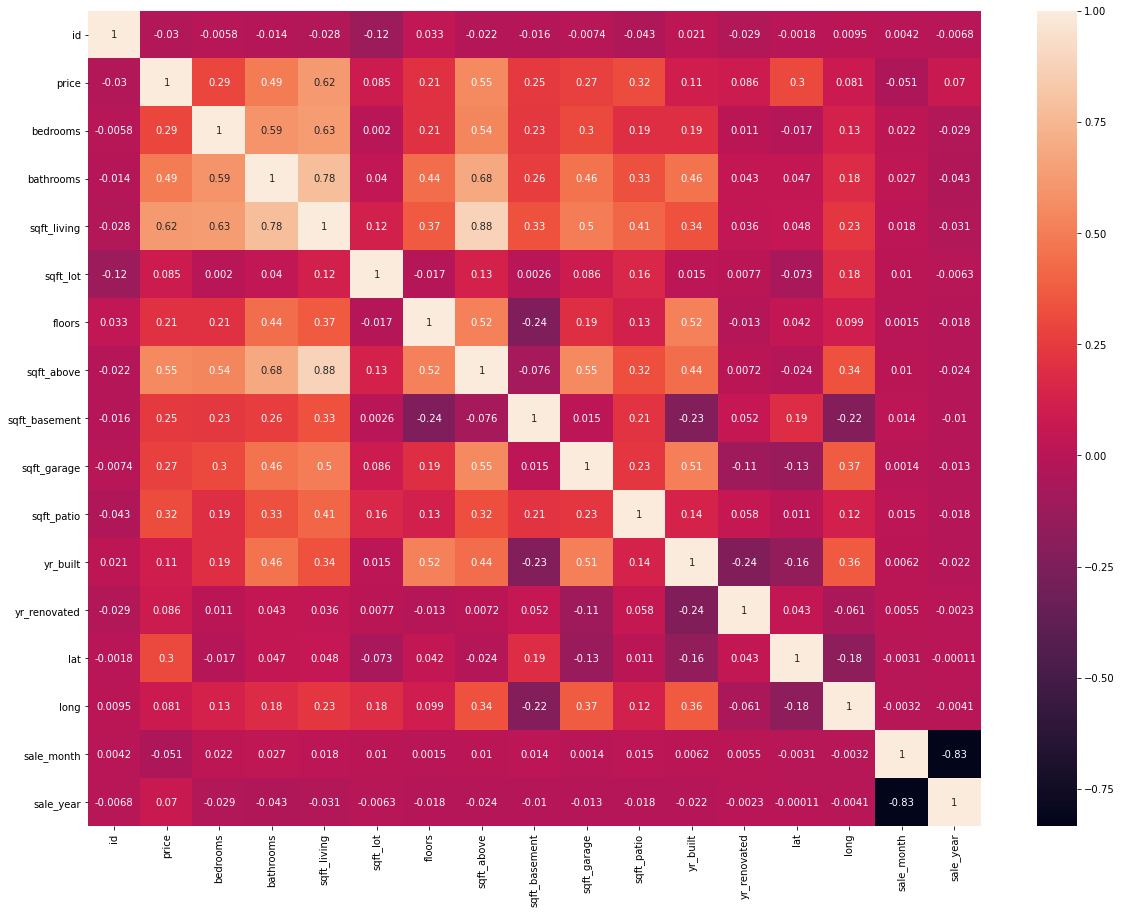

In [11]:
#Run heatmap to identify variables most correlated with price 
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot = True)
plt.show();

# sqft_living most correlated with price, use as single variable base model

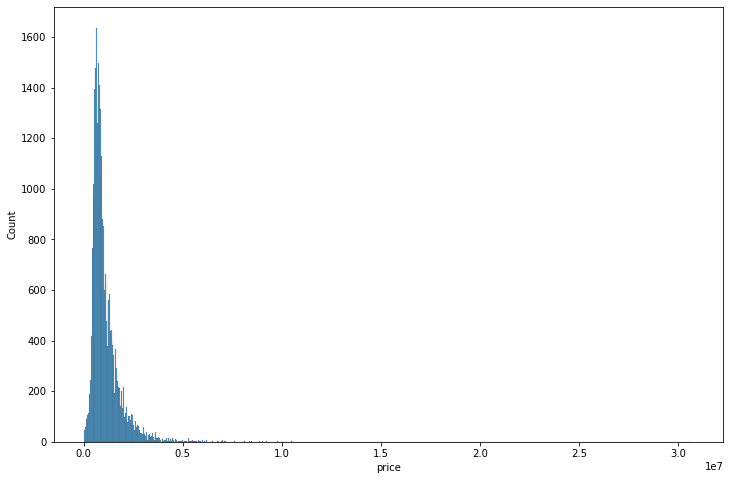

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(x='price', data = df)
plt.show()

In [20]:
# log sqft_living and sqft_above which are the two most correlated factors with price, ensuring a normal distro
import numpy as np
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_lot'] = np.log(df['sqft_lot'])

# Creating Pairplot for Colinearity

In [ ]:
sns.pairplot(df.sample(3000))

# Creating Base Model 

In [21]:
# Run train-test split to create test and control group

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import numpy as np


X = df['log_sqft_living'].values.reshape(-1,1)
y = df['log_price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

#baseline r-squared value is .1102  



0.3573450745797273

# Model 1: Multi-Linear using select numeric columns and standard scalar

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28971 entries, 0 to 28970
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             28971 non-null  int64         
 1   date           28971 non-null  datetime64[ns]
 2   price          28971 non-null  float64       
 3   bedrooms       28971 non-null  int64         
 4   bathrooms      28971 non-null  float64       
 5   sqft_living    28971 non-null  int64         
 6   sqft_lot       28971 non-null  int64         
 7   floors         28971 non-null  float64       
 8   waterfront     28971 non-null  object        
 9   greenbelt      28971 non-null  object        
 10  nuisance       28971 non-null  object        
 11  view           28971 non-null  object        
 12  condition      28971 non-null  object        
 13  grade          28971 non-null  object        
 14  heat_source    28971 non-null  object        
 15  sewer_system   2897

In [22]:
ind_vars = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'log_sqft_above', 'sqft_basement',
            'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year']

In [24]:

X = df[ind_vars]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)


model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
# dict(zip(X_test.columns, model.coef_))

# R-squared improves to .4232


0.41000816628720904

In [ ]:
#OLS to examine 

import statsmodels.api as sm

X = df[ind_vars]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)


model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
print(model_OLS.summary())


In [ ]:
model_pred = model_OLS.predict()
resids = y_train - model_pred

resids[abs(resids) < 5000].hist(bins=30);

#Durbin-Watson confirms independence of errors. Residual histogram confirms normality. 

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_train, resids);

#Minimal spread in residual scatter confirms homoskedasticity 

In [ ]:
df.info()

# Model 1.5: Dropping Co-linear Features + Not Stat Sig Features

In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'log_sqft_above', 'sqft_basement',
            'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year']

In [ ]:
X = df[ind_vars]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

# Model 2: Add Interaction Variable for Living Space 

In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'log_sqft_above', 'sqft_basement',
            'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction']

In [ ]:
# interaction_living = bedrooms + bathrooms + sqft_living + sqft_above 

df['living_interaction'] = df['bedrooms'] * df['bathrooms'] * df['sqft_living'] * df['sqft_above'] * df['floors']

X = df[ind_vars]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

#model score with all individual variables and living_interaction included: .4234


In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'log_sqft_above', 'sqft_basement',
            'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction']

In [ ]:
df['living_interaction'] = df['bedrooms'] * df['bathrooms'] * df['sqft_living'] * df['sqft_above'] * df['floors']

X = df[ind_vars]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

#model score with all individual variables removed and only using living_interaction: .23749

# Model 3: Adding Binary and Ordinal Categorical Data

In [ ]:
df.info()

In [ ]:
# identify which variables are nominal and which are ordinal

df['waterfront'].value_counts()
#waterfront is binary, replace with No = 0, Yes = 1

df['greenbelt'].value_counts()
# #greenbelt is binary, replace with No = 0, Yes = 1

df['nuisance'].value_counts()
# #nuisance is binary, replace with No = 0, Yes = 1

df['view'].value_counts()
# #view is ordinal. Set {None: 0, Fair:1, Average:2, Good:3, Excellent:4}

df['condition'].value_counts()
# #condition is ordinal. Set {Poor: 0, Fair:1, Average:2, Good:3, Very Good:4}

df['grade'].value_counts()
# #grade is ordinal. Set {2 Substandard: 0, 3 Poor: 1, 4 Low: 2, 5 Fair: 3, 6 Low Average: 4, 7 Average: 5,
# # 8 Good: 6, 9 Better: 7, 10 Very Good: 8, 11 Excellent: 9, 12 Luxury: 10, 13 Mansion: 11}

# df['heat_source'].value_counts()
# #heat source is nominal. split into columns with onehot encoder

# df['sewer_system'].value_counts()
# #sewer system is nominal. split into columns with onehot encoder

# df['City'].value_counts()
# #city is nominal. TBD

# df['ZIP'].value_counts()
# #city is nominal. TBD

In [ ]:

from sklearn.preprocessing import OrdinalEncoder
ord_cat_selector = ['view', 'condition', 'grade']
cat_subset = df[ord_cat_selector]
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
              , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
o_enc = OrdinalEncoder(categories = [view_list, condition_list, grade_list])
o_enc.fit(cat_subset)
o_enc.transform(cat_subset)

X_ord = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_ord.rename(columns = {'view':'view_ord', 'condition': 'condition_ord', 'grade':'grade_ord'}, inplace = True)
df_ord = pd.concat([df, X_ord], axis =1)
df_ord.head()

df_ord['waterfront'] = df_ord['waterfront'].map({'NO': 0, 'YES': 1})
df_ord['greenbelt'] = df_ord['greenbelt'].map({'NO': 0, 'YES': 1})
df_ord['nuisance'] = df_ord['nuisance'].map({'NO': 0, 'YES': 1})




ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction',
               'waterfront', 'greenbelt', 'nuisance', 'view_ord', 'condition_ord', 'grade_ord']


X = df_ord[ind_vars]
y = np.log(df_ord['price'])
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                               columns=X_train.columns,
                               index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                              columns=X_test.columns,
                              index=X_test.index)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)


# Model 5: Add Nominal Categorical Data 

In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction',
               'waterfront', 'greenbelt', 'nuisance', 'view_ord', 'condition_ord', 'grade_ord', 'heat_source',
           'sewer_system', 'City', 'ZIP']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df_ord[ind_vars]
y = np.log(df_ord['price'])
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

train_ohe = ohe.fit_transform(X_train[['heat_source','sewer_system', 'City', 'ZIP']])
test_ohe = ohe.transform(X_test[['heat_source','sewer_system', 'City', 'ZIP']])



ohe_train = pd.DataFrame(train_ohe, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(test_ohe, columns = ohe.get_feature_names())



X_train = pd.concat([X_train.drop(columns =['heat_source','sewer_system', 'City', 'ZIP']).reset_index(), ohe_train],1)
X_test = pd.concat([X_test.drop(columns =['heat_source','sewer_system', 'City', 'ZIP']).reset_index(), ohe_test],1)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction',
               'waterfront', 'greenbelt', 'nuisance', 'view_ord', 'condition_ord', 'grade_ord']

    
X_train[cols_to_scale] =scaler.fit_transform(X_train[cols_to_scale])

X_test[cols_to_scale] =scaler.fit_transform(X_test[cols_to_scale])








In [ ]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
# All categorical and numerical data included: .6011

# Model 6: Add Education Data 

In [ ]:
# Create a city/town - school district map

school_district_map = {
    "Seattle" : "Seattle School District",
    "Renton" : "Renton School District",
    "Kent": "Kent School District",
    "Auburn": "Auburn School District",
    "Bellevue": "Bellevue School District",
    "Kirkland": "Lake Washington School District",
    "Federal Way": "Federal Way School District",
    "Redmond": "Lake Washington School District",
    "Sammamish": "Issaquah School District", 
    "Maple Valley": "Tahoma School District",
    "Shoreline": "Shoreline School District",
    "Burien": "Highline School District",
    "Woodinville": "Northshore School District",
    "Issaquah": "Issaquah School District",
    "Covington": "Kent School District",
    "North Bend": "Snoqualmie Valley School District",
    "Enumclaw": "Enumclaw School District",
    "Des Moines": "Highline School District",
    "Mercer Island": "Mercer Island School District",
    "Kenmore": "Northshore School District",
    "Snoqualmie": "Snoqualmie Valley School District",
    "Black Diamond": "Tahoma School District",
    "Bothell": "Northshore School District",
    "SeaTac": "Highline School District",
    "Duvall": "Riverview School District",
    "Lake Forest Park": "Shoreline School District",
    "Vashon": "Vashon Island School District", 
    "Newcastle": "Issaquah School District",
    "Tukwila": "Tukwila School District",
    "Carnation": "Riverview School District",
    "Normandy Park": "Highline School District", 
    "Fall City": "Snoqualmie Valley School District",
    "Pacific": "Auburn School District",
    "Ravensdale": "Tahoma School District",
    "Clyde Hill": "Bellevue School District",
    "Medina": "Bellevue School District",
    "Algona": "Auburn School District",
    "Milton": "Fife School District",
    "Skykomish": "Skykomish School District",
    "Yarrow Point": "Bellevue School District",
    "Beaux Arts": "Bellevue School District",
    "Hunts Point": "Bellevue School District",
    "Baring": "Skykomish School District",
    "Preston": "Issaquah School District",
    "Hobart": "Tahoma School District",
    "Union Hill-Novelty Hill": "Lake Washington School District",
    "Snoqualmie Pass": "Snoqualmie Valley School District",
    "Lakeland North": "Auburn School District",
    "Fairwood": "Kent School District",
    "Cottage Lake": "Northshore School District",
    "Ames Lake": "Snoqualmie Valley School District",
    "White Center": "Highline School District",
    "Dilworth": "Vashon Island School District",
}

school_district_data = {
    "school_district": ["Seattle School District", "Renton School District", "Kent School District", "Auburn School District", "Bellevue School District", "Lake Washington School District", "Federal Way School District", "Issaquah School District", "Tahoma School District", "Shoreline School District", "Highline School District", "Northshore School District", "Snoqualmie Valley School District", "Enumclaw School District", "Mercer Island School District", "Riverview School District", "Vashon Island School District", "Tukwila School District", "Fife School District", "Skykomish School District"],
    
    "math_scores(%)": [51.6, 32.5, 33.7, 30.2, 65.6, 70.2, 21.7, 69.6, 59.0, 55.2, 21.5, 59.6, 64.4, 40.1, 76.9, 54.7, 51.3, 16.7, 30.8, 23.8],
    
    "ela_scores(%)": [62.7, 42.9, 47.9, 43.6, 72.3, 78.5, 35.6, 76.0, 69.2, 66.6, 33.4, 72.0, 75.3, 56.7, 82.0, 69.0, 62.3, 29.6, 46.2, 71.4],
    
    "graduation_rate(%)": [88, 83, 89, 86, 94, 94, 87, 97, 94, 90, 84, 96, 96, 86, 92, 92, 94, 87, 92, 0.0],
    
    "student_expenditure($)": [18397, 16802, 16005, 16463, 17215, 14934, 16332, 15816, 14991, 15900, 17445, 15766, 15168, 15708, 16665, 15508, 16038, 18473, 15264, 58360],
    
    "kindergarten_readiness(%)": [68.3, 56.0, 47.2, 46.4, 60.0, 65.5, 46.0, 74.6, 63.1, 62.5, 55.5, 73.2, 80.6, 61.4, 78.9, 72.8, 75.0, 48.5, 48.3, 0.0],
    
}

df_school = pd.DataFrame(school_district_data)


In [ ]:
df_ord["school_district"] = df_ord["City"].map(school_district_map)
df_ord_edu = pd.merge(df_ord, df_school, on = "school_district")

In [ ]:
df_ord_edu.head()

In [ ]:
df_ord_edu["score_interaction"] = df_ord_edu["ela_scores(%)"]*df_ord_edu["math_scores(%)"]*df_ord_edu["student_expenditure($)"]

In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction',
               'waterfront', 'greenbelt', 'nuisance', 'view_ord', 'condition_ord', 'grade_ord', 'heat_source',
           'sewer_system', 'City', 'ZIP', 'math_scores(%)', 'ela_scores(%)','graduation_rate(%)',
            'student_expenditure($)','kindergarten_readiness(%)', 'score_interaction']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df_ord_edu[ind_vars]
y = np.log(df_ord_edu['price'])
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

train_ohe = ohe.fit_transform(X_train[['heat_source','sewer_system', 'City', 'ZIP']])
test_ohe = ohe.transform(X_test[['heat_source','sewer_system', 'City', 'ZIP']])



ohe_train = pd.DataFrame(train_ohe, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(test_ohe, columns = ohe.get_feature_names())



X_train = pd.concat([X_train.drop(columns =['heat_source','sewer_system', 'City', 'ZIP']).reset_index(), ohe_train],1)
X_test = pd.concat([X_test.drop(columns =['heat_source','sewer_system', 'City', 'ZIP']).reset_index(), ohe_test],1)

In [ ]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)
# new r-squared with education: .6275

# Model 7: Add Crime Data 

In [ ]:
crime_df = pd.read_csv("data-pozo/crime.csv")
crime_df1 = crime_df.drop(columns = ["case_number", "nibrs_code", "reporting_area", "district", "precinct", "created_at", "updated_at", "hour_of_day", "day_of_week", "ID"])
crime_df1["Year"] = crime_df1["incident_datetime"].apply(lambda x: x[6:10])
crime_df1["city"] = crime_df1["city"].apply(lambda x: str(x).lower().title())
crime_df1.rename(columns = {"city": "City"}, inplace = True)
crime_df1.drop_duplicates(inplace = True)
crime_df1 = crime_df1[(crime_df1["Year"] == "2021") | (crime_df1["Year"] == "2022")]
crime_df1 = crime_df1.drop(columns = ["incident_datetime"])

city_list = ["Seattle", "Renton", "Kent", "Auburn", "Bellevue", "Kirkland", "Federal Way", "Redmond", "Sammamish", "Maple Valley", "Shoreline", "Burien", "Woodinville", "Issaquah", "Covington", "North Bend", "Enumclaw", "Des Moines", "Mercer Island", "Kenmore", "Snoqualmie", "Black Diamond", "Bothell", "Seatac", "Duvall", "Lake Forest Park", "Vashon", "Newcastle", "Tukwila", "Carnation", "Normandy Park", "Fall City", "Pacific", "Ravensdale", "Clyde Hill", "Medina", "Algona", "Milton", "Skykomish", "Yarrow Point", "Beaux Arts", "Hunts Point", "Baring", "Preston", "Hobart", "Union Hill-Novelty Hill", "Snoqualmie Pass", "Lakeland North", "Fairwood", "Cottage Lake", "Ames Lake", "White Center", "Dilworth"]
crime_df1 = crime_df1[crime_df1['City'].isin(city_list)]
crime_df1.dropna(subset = ["nibrs_code_name"])
crime_by_city = crime_df1.groupby(["City"]).count()
crime_by_city = crime_by_city[["nibrs_code_name"]].reset_index()
crime_by_city.rename(columns = {"nibrs_code_name": "crime_number"}, inplace = True)


pop_dict = {"Seattle": 762500, "Renton": 107500, "Kent": 137900, "Auburn": 78690, "Bellevue": 153900, "Kirkland": 93570, "Federal Way": 101800, "Redmond": 75270, "Sammamish": 68150, "Maple Valley": 28920, "Shoreline": 60320, "Burien": 52490, "Woodinville": 13450, "Issaquah": 40950, "Covington": 21200, "North Bend": 7915, "Enumclaw": 12910, "Des Moines": 33160, "Mercer Island": 25780, "Kenmore": 137900, "Snoqualmie": 14490, "Black Diamond": 6145, "Bothell": 29210, "Seatac": 31910, "Duvall": 8320, "Lake Forest Park": 13620, "Vashon": 11055, "Newcastle": 13560, "Tukwila": 22620, "Carnation": 2160, "Normandy Park": 6790, "Fall City": 2032, "Pacific": 7230, "Ravensdale": 390, "Clyde Hill": 3110, "Medina": 2915, "Algona": 3300, "Milton": 13560, "Skykomish": 165, "Yarrow Point": 1125, "Beaux Arts": 315, "Hunts Point": 460, "Baring": 267, "Preston": 523, "Hobart": 6932, "Union Hill-Novelty Hill": 22683, "Snoqualmie Pass": 390, "Lakeland North": 13879, "Fairwood": 10541, "Cottage Lake": 22965, "Ames Lake": 1486, "White Center": 16631, "Dilworth": 0.0}
pop_df = pd.DataFrame(pop_dict, index = [0])
pop_df = pop_df.transpose()
pop_df = pop_df.sort_index()
pop_df = pop_df.reset_index()
pop_df.rename(columns = {"index": "City", 0: "Population"}, inplace = True)

crime_per_capita = pd.merge(crime_by_city, pop_df, on = "City")
crime_per_capita["crime_per_capita"] = crime_per_capita["crime_number"]/ crime_per_capita["Population"]

df_ord_edu_crime = pd.merge(df_ord_edu, crime_per_capita, on = "City")
df_ord_edu_crime.head()

In [ ]:
df_ord_edu_crime.head()

In [ ]:
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'sale_month', 'sale_year', 'living_interaction',
               'waterfront', 'greenbelt', 'nuisance', 'view_ord', 'condition_ord', 'grade_ord', 'heat_source',
           'sewer_system', 'ZIP', 'math_scores(%)', 'ela_scores(%)','graduation_rate(%)',
            'student_expenditure($)','kindergarten_readiness(%)', 'score_interaction', 'crime_per_capita']


In [ ]:
X = df_ord_edu_crime[ind_vars]
y = np.log(df_ord_edu_crime['price'])
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

train_ohe = ohe.fit_transform(X_train[['heat_source','sewer_system', 'ZIP']])
test_ohe = ohe.transform(X_test[['heat_source','sewer_system', 'ZIP']])



ohe_train = pd.DataFrame(train_ohe, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(test_ohe, columns = ohe.get_feature_names())


X_train = pd.concat([X_train.drop(columns =['heat_source','sewer_system', 'ZIP']).reset_index(), ohe_train],1)
X_test = pd.concat([X_test.drop(columns =['heat_source','sewer_system', 'ZIP']).reset_index(), ohe_test],1)
y_train = y_train.reset_index(drop = True)

In [ ]:
X_train.head()

In [ ]:
model = lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

# model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train)).fit()
# print(model_OLS.summary())


# Brendan Example

In [ ]:
## brendan 
df_ord.columns.tolist()

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
model_cols = [ 
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'sale_month',
 'sale_year',
 'ZIP',
 'view_ord',
 'condition_ord',
 'grade_ord']


X = df_ord[model_cols]
y = np.log(df_ord['price'])


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 42)


ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')



ss = StandardScaler.fit_transform(X_train[model_cols])
ss_test = StandardScaler.transform(X_test[model_cols])

X_train_ss = pd.DataFrame(ss, columns = X_train.columns)
X_test_ss = pd.DataFrame(ss_test, columns = X_train.columns)



ohe_train = ohe.fit_transform(X_train[['ZIP']])
ohe_test = ohe.transform(X_test[['ZIP']])

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

X_train = pd.concat([X_train.drop('ZIP',1).reset_index(), ohe_train], 1)
X_test = pd.concat([X_test.drop('ZIP',1).reset_index(), ohe_test], 1)


lr = LinearRegression()
lr.fit(X_train, y_train)
print('test:', lr.score(X_test, y_test))
print('train:', lr.score(X_train, y_train))


lrr = LinearRegression()
lrr.fit(X_train_ss, y_train)
print('test ss:', lr.score(X_test_ss, y_test))
print('train ss:', lr.score(X_train_ss, y_train))



 #'school_district'

# Recommendations